In [ ]:
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("auto-mpg.csv")

# Display the first few rows
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# Find Shape & Number of Columns
print("Shape of Dataset:", df.shape)
print("Number of Columns:", df.shape[1])

# Display Column Info
print("\nDataset Info:")
df.info()

# Statistical Summary
print("\nStatistical Summary:")
print(df.describe())


Shape of Dataset: (398, 9)
Number of Columns: 9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB

Statistical Summary:
              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841

In [ ]:
# Find Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Total Sum of Missing Values
print("\nTotal Missing Values:", df.isnull().sum().sum())



Missing Values in Each Column:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Total Missing Values: 0


In [ ]:
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Unique values in {column}: {unique_values}")


Unique values in mpg: 129
Unique values in cylinders: 5
Unique values in displacement: 82
Unique values in horsepower: 94
Unique values in weight: 351
Unique values in acceleration: 95
Unique values in model year: 13
Unique values in origin: 3
Unique values in car name: 305


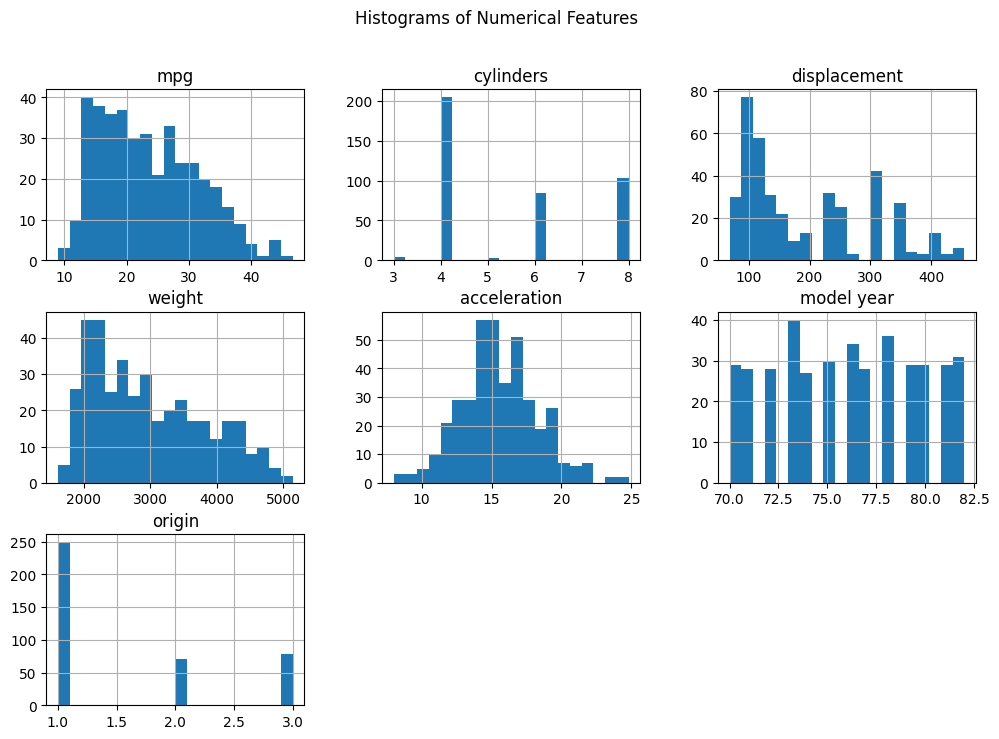

In [ ]:
df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()


<ipython-input-36-21ec6ae03324>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=numeric_cols[0], y=numeric_cols[1], palette="viridis")
<ipython-input-36-21ec6ae03324>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=numeric_cols[-2], y=numeric_cols[-1], palette="coolwarm")


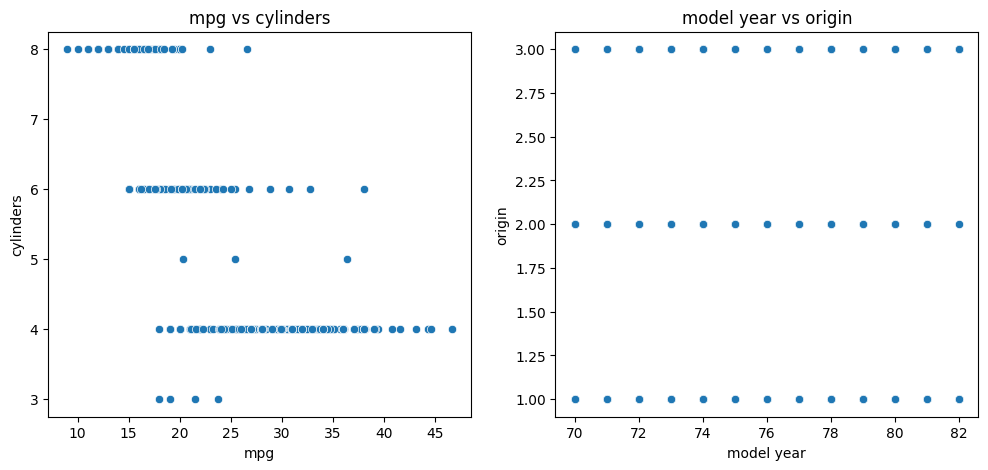

In [ ]:
# Scatterplots
# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x=numeric_cols[0], y=numeric_cols[1], palette="viridis")
plt.title(f"{numeric_cols[0]} vs {numeric_cols[1]}")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x=numeric_cols[-2], y=numeric_cols[-1], palette="coolwarm")
plt.title(f"{numeric_cols[-2]} vs {numeric_cols[-1]}")

plt.show()

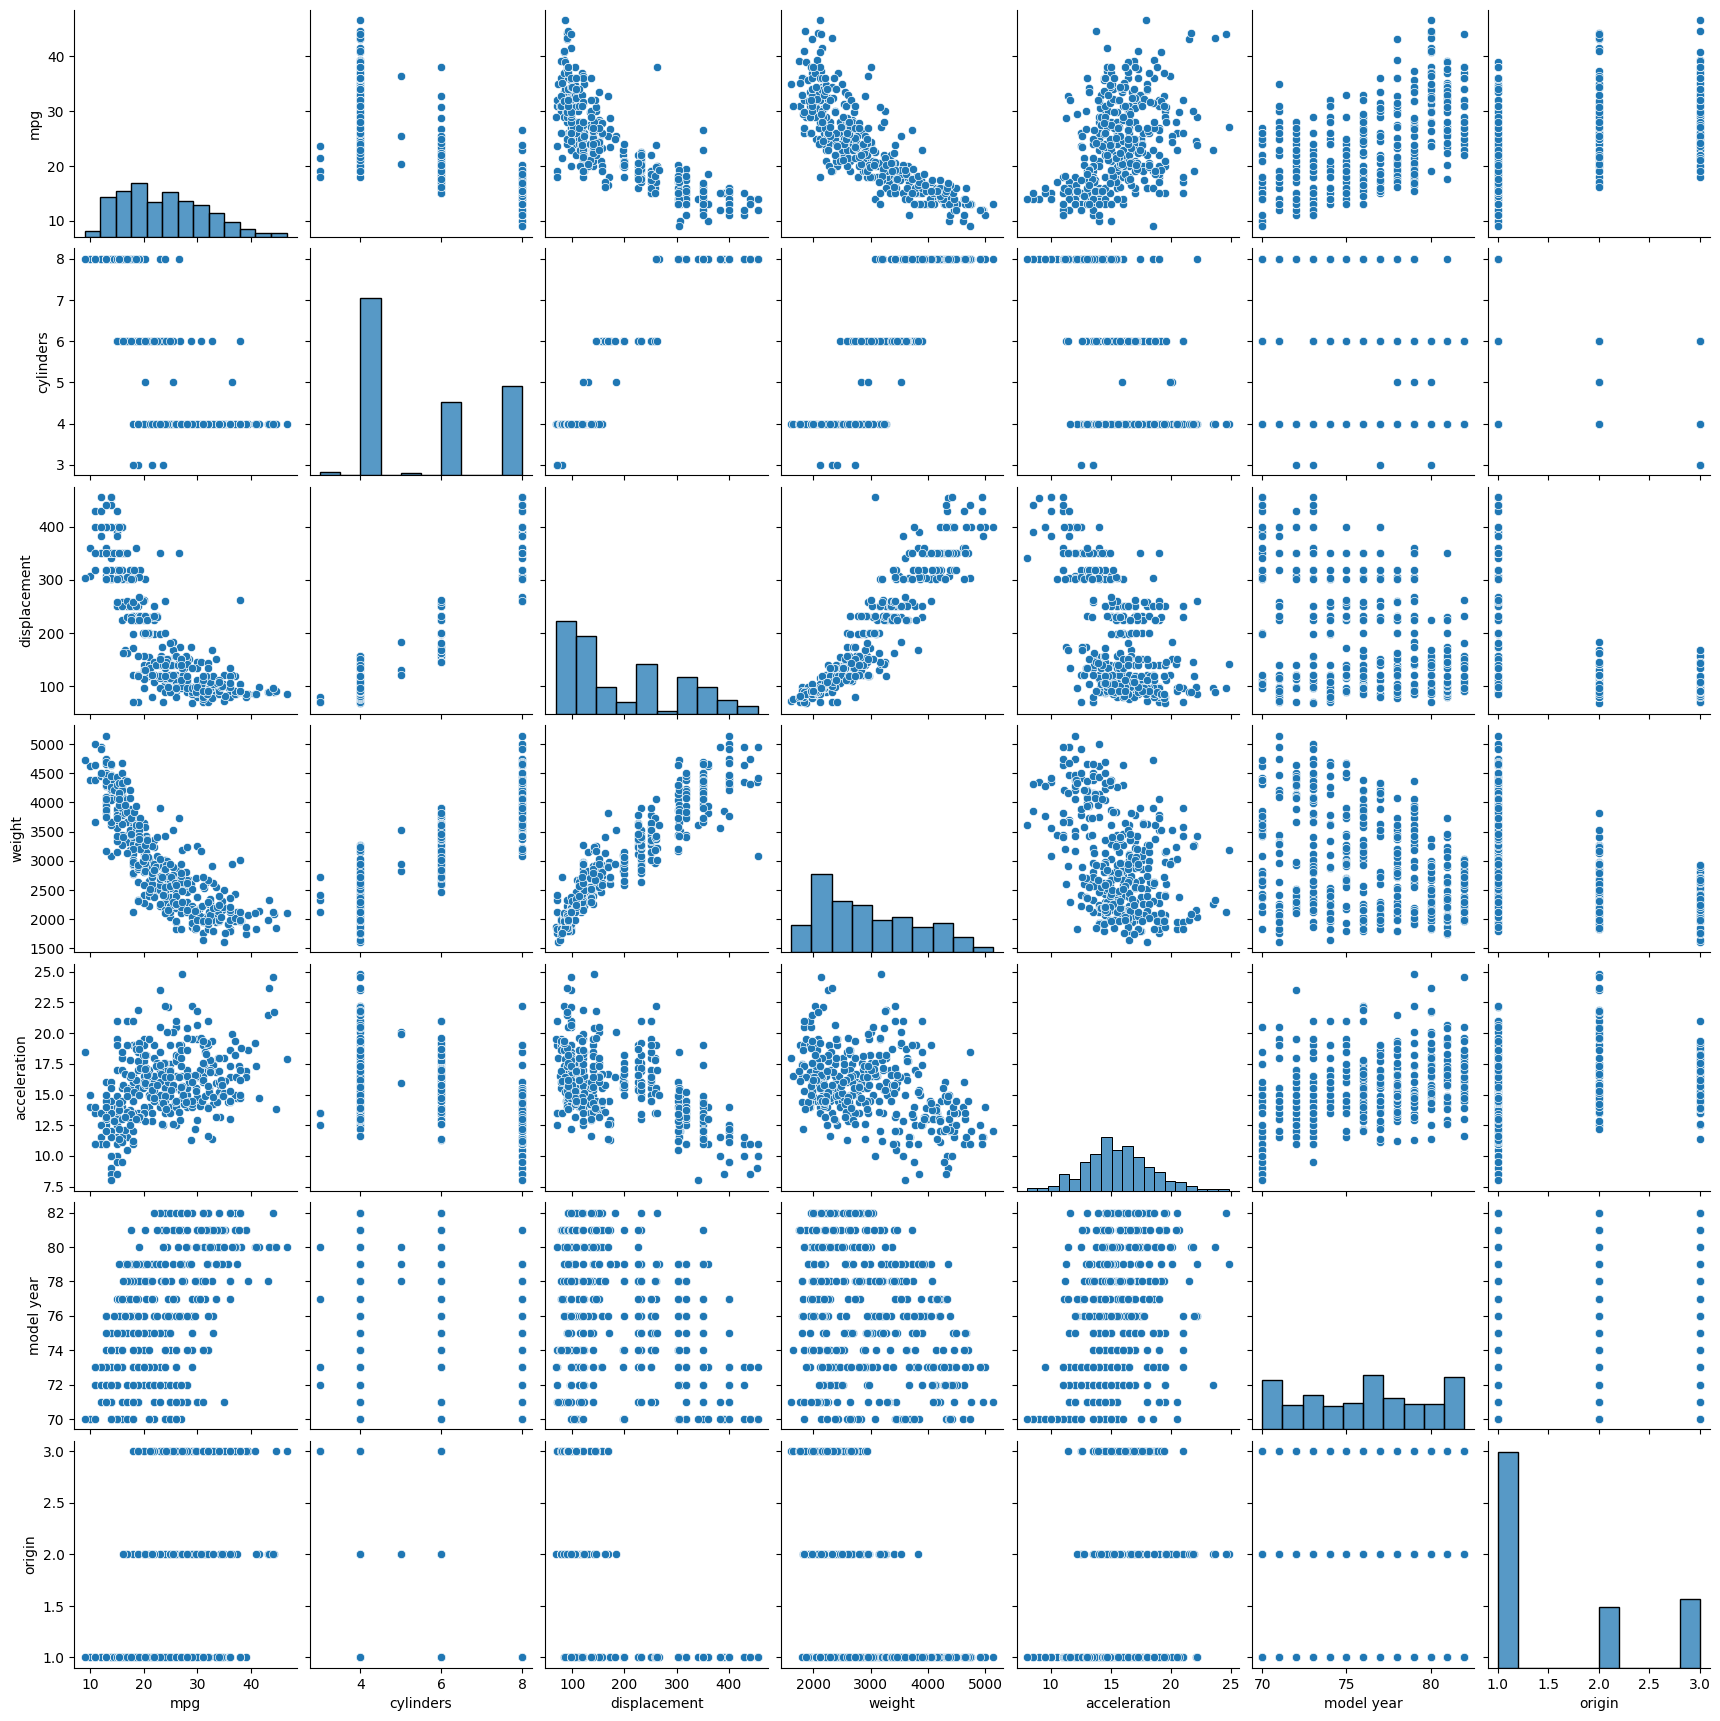

In [ ]:
sns.pairplot(df)
plt.show()


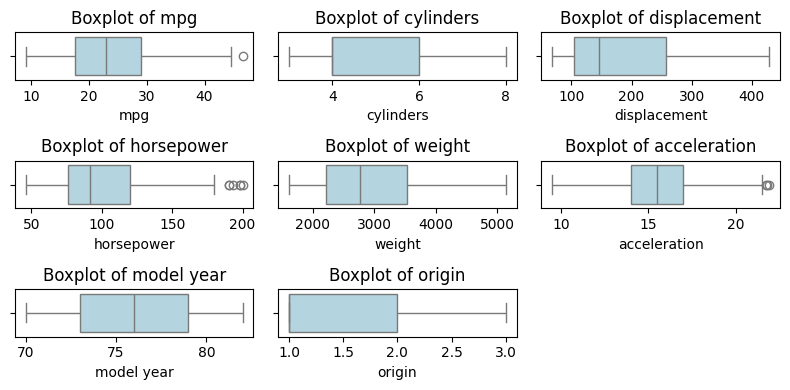

In [ ]:
# Boxplots for outlier detection
# Select numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Calculate number of rows and columns for subplots
num_cols = len(df_numeric.columns)
num_rows = (num_cols + 2) // 3  # Calculate rows, ensuring at least 1

plt.figure(figsize=(8, 4))  # Adjust figure height based on rows

for i, col in enumerate(df_numeric.columns, 1):
    plt.subplot(num_rows, 3, i)  # Use calculated rows and 3 columns
    sns.boxplot(x=df_numeric[col], color="lightblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [ ]:
# Define function to remove outliers
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Apply to all numeric columns
for col in df.select_dtypes(include=[np.number]).columns:
    df = remove_outliers(df, col)

# Display shape after removing outliers
print("\nShape after outlier removal:", df.shape)



Shape after outlier removal: (373, 9)


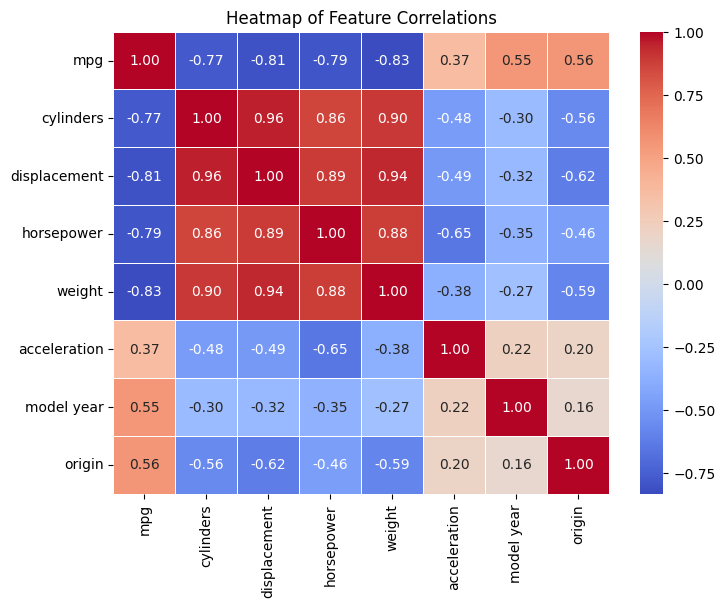

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()